# Training

In [2]:
import numpy as np
import mygrad as mg
import mynn

from mynn.layers.dense import dense
from mynn.optimizers.adam import Adam

from mygrad.nnet.losses.margin_ranking_loss import margin_ranking_loss
from mygrad.nnet.initializers import glorot_normal

import pickle

%matplotlib notebook
import matplotlib.pyplot as plt

In [ ]:
class LinearEncoder:
    def __init__(self, d_input, d_output):
        """ This initializes all of the layers in our model, and sets them
        as attributes of the model.
        
        Parameters
        ----------
        d_input : int
            The size of the inputs.
            
        d_output : int
            The size of the outputs (i.e., the reduced dimensionality).
        """
        
        self.encoder = dense(d_input, d_output, weight_initializer=glorot_normal)
        
    def __call__(self, x):
        '''Passes data as input to our model, performing a "forward-pass".
        
        This allows us to conveniently initialize a model `m` and then send data through it
        to be classified by calling `m(x)`.
        
        Parameters
        ----------
        x : Union[numpy.ndarray, mygrad.Tensor], shape=(M, D_full)
            A batch of data consisting of M pieces of data,
            each with a dimentionality of D_full.
            
        Returns
        -------
        mygrad.Tensor, shape=(M, D_full)
            The model's prediction for each of the M pieces of data.
        '''
        
        return self.encoder(x) 
        
    @property
    def parameters(self):
        """ A convenience function for getting all the parameters of our model.
        
        This can be accessed as an attribute, via `model.parameters` 
        
        Returns
        -------
        Tuple[Tensor, ...]
            A tuple containing all of the learnable parameters for our model """
        
        return self.encoder.parameters

/Users/ria/opt/anaconda3/envs/week3/lib/python3.8/site-packages/noggin/plotter.py:364: UserWarning: Live plotting is not supported when matplotlib uses the 'module://ipykernel.pylab.backend_inline'
backend. Instead, use the 'nbAgg' backend.

In a Jupyter notebook, this can be activated using the cell magic:
   %matplotlib notebook.
  warn(cleandoc(_inline_msg.format(self._backend)))


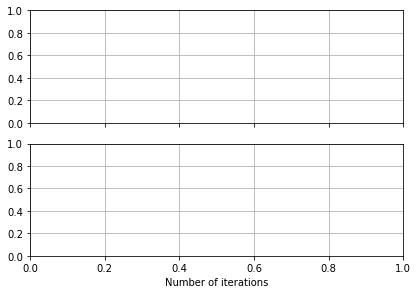

In [1]:
from noggin import create_plot
plotter, fig, ax = create_plot(["loss", "accuracy"])

In [ ]:
model = LinearEncoder(d_input=512, d_output=50)
optimizer = Adam(model.parameters)

In [ ]:
plot_every = 500

for k in range(100000):
    
    output = model(x)
        
    loss = margin_ranking_loss(s_good, s_bad, y=1)
    
    acc = float(np.argmax(output.data.squeeze()) == target.item())

    plotter.set_train_batch({"loss":loss.item(), "accuracy":acc}, batch_size=1, plot=False)
    
    if k % plot_every == 0 and k > 0:
        plotter.set_train_epoch()

    loss.backward()
    optimizer.step()
    loss.null_gradients()